**Data Analytics II**

**Import all necessary libraries**

---



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score

**Import the Social_Media_Adv Dataset**

In [3]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


{'Social_Network_Ads.csv': b'Age,EstimatedSalary,Purchased\r\n19,19000,0\r\n35,20000,0\r\n26,43000,0\r\n27,57000,0\r\n19,76000,0\r\n27,58000,0\r\n27,84000,0\r\n32,150000,1\r\n25,33000,0\r\n35,65000,0\r\n26,80000,0\r\n26,52000,0\r\n20,86000,0\r\n32,18000,0\r\n18,82000,0\r\n29,80000,0\r\n47,25000,1\r\n45,26000,1\r\n46,28000,1\r\n48,29000,1\r\n45,22000,1\r\n47,49000,1\r\n48,41000,1\r\n45,22000,1\r\n46,23000,1\r\n47,20000,1\r\n49,28000,1\r\n47,30000,1\r\n29,43000,0\r\n31,18000,0\r\n31,74000,0\r\n27,137000,1\r\n21,16000,0\r\n28,44000,0\r\n27,90000,0\r\n35,27000,0\r\n33,28000,0\r\n30,49000,0\r\n26,72000,0\r\n27,31000,0\r\n27,17000,0\r\n33,51000,0\r\n35,108000,0\r\n30,15000,0\r\n28,84000,0\r\n23,20000,0\r\n25,79000,0\r\n27,54000,0\r\n30,135000,1\r\n31,89000,0\r\n24,32000,0\r\n18,44000,0\r\n29,83000,0\r\n35,23000,0\r\n27,58000,0\r\n24,55000,0\r\n23,48000,0\r\n28,79000,0\r\n22,18000,0\r\n32,117000,0\r\n27,20000,0\r\n25,87000,0\r\n23,66000,0\r\n32,120000,1\r\n59,83000,0\r\n24,58000,0\r\n24,19000

In [4]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

**Checking Basic statistics of the dataset**

In [15]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
df.tail

<bound method NDFrame.tail of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

**Checking for NAN values**

In [11]:
df.isna()

,Age,EstimatedSalary,Purchased
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
395,False,False,False
396,False,False,False
397,False,False,False
398,False,False,False


In [12]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Displaying dimensions of the dataframe**

In [16]:
df.shape

(400, 3)

**Loading 'Age', 'Estimated_salary' as the features in 'x' and 'Purchased' as the target variable in 'y'**

In [17]:
x = df.iloc[:,2:4]

In [19]:
y = df.iloc[:,2:4]

**Spliting data into 75% training and 25% testing data**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

**Using the StandardScaler to standardize the values**

In [21]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

**Preparing and Training our Logistic Regression model with the training and testing data**

In [22]:
lr = LogisticRegression(random_state = 0,solver = 'lbfgs')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
       
print(x_test[:10])
print('-'*15)
print(pred[:10])

[[-0.73918317]
 [ 1.35284466]
 [-0.73918317]
 [ 1.35284466]
 [-0.73918317]
 [-0.73918317]
 [ 1.35284466]
 [-0.73918317]
 [-0.73918317]
 [-0.73918317]]
---------------
[0 1 0 1 0 0 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
print('Expected Output:',pred[:10])
print('-'*15)
print('Predicted Output:\n',y_test[:10])

Expected Output: [0 1 0 1 0 0 1 0 0 0]
---------------
Predicted Output:
      Purchased
209          0
280          1
33           0
210          1
93           0
84           0
329          1
94           0
266          0
126          0


**Evaluating the model based on confusion matrix**

In [24]:
matrix = confusion_matrix(y_test,pred,labels = lr.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[63  0]
 [ 0 37]]


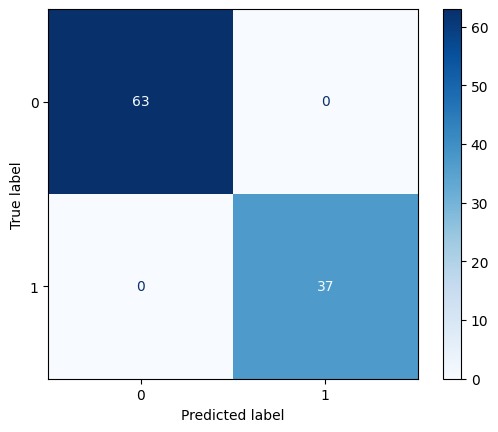

In [25]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()


**Determining the Accuracy,Error Rate,Recall,Precision of the model**

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [27]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 1.00
Error Rate:  0.0
Sensitivity (Recall or True positive rate) : 1.0
Specificity (True negative rate) : 1.0
Precision (Positive predictive value) : 1.0
False Positive Rate : 0.0
